# Описание данных
- age (числовой): Возраст клиента.
- job (категориальный): Род занятий.
Варианты: admin., technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, student, self-employed, unknown.
- marital (категориальный): Семейное положение.
- married, single, divorced.
- education (категориальный): Уровень образования.
secondary, tertiary, primary, unknown.
- default (бинарный): Имеется ли просроченный кредит?
yes, no.
- balance (числовой): Средний годовой баланс на счете (в условных единицах). Может быть отрицательным.
- housing (бинарный): Есть ли ипотечный кредит?
yes, no.
- loan (бинарный): Есть ли персональный кредит?
yes, no.
- contact (категориальный): Тип связи.
cellular (мобильный), telephone (стационарный), unknown.
- day (числовой): Последний день месяца, когда с клиентом связывались.
- month (категориальный): Последний месяц, когда с клиентом связывались.
jan, feb, mar, ..., dec
- duration (числовой): Длительность последнего звонка в секундах.
- campaign (числовой): Количество контактов с данным клиентом в течение этой кампании.
- pdays (числовой): Количество дней, прошедших с последнего контакта с клиентом в предыдущей кампании.
-1 означает, что клиента ранее не контактировали.
- previous (числовой): Количество контактов с данным клиентом до этой кампании.
- poutcome (категориальный): Результат предыдущей маркетинговой кампании.
success, failure, other, unknown.
- deposit (бинарный): Целевая переменная. Подписался ли клиент на срочный вклад?
yes, no.

# EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('bank.csv')

In [87]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [89]:
descr = df.describe().transpose()
descr

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [51]:
descr.index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

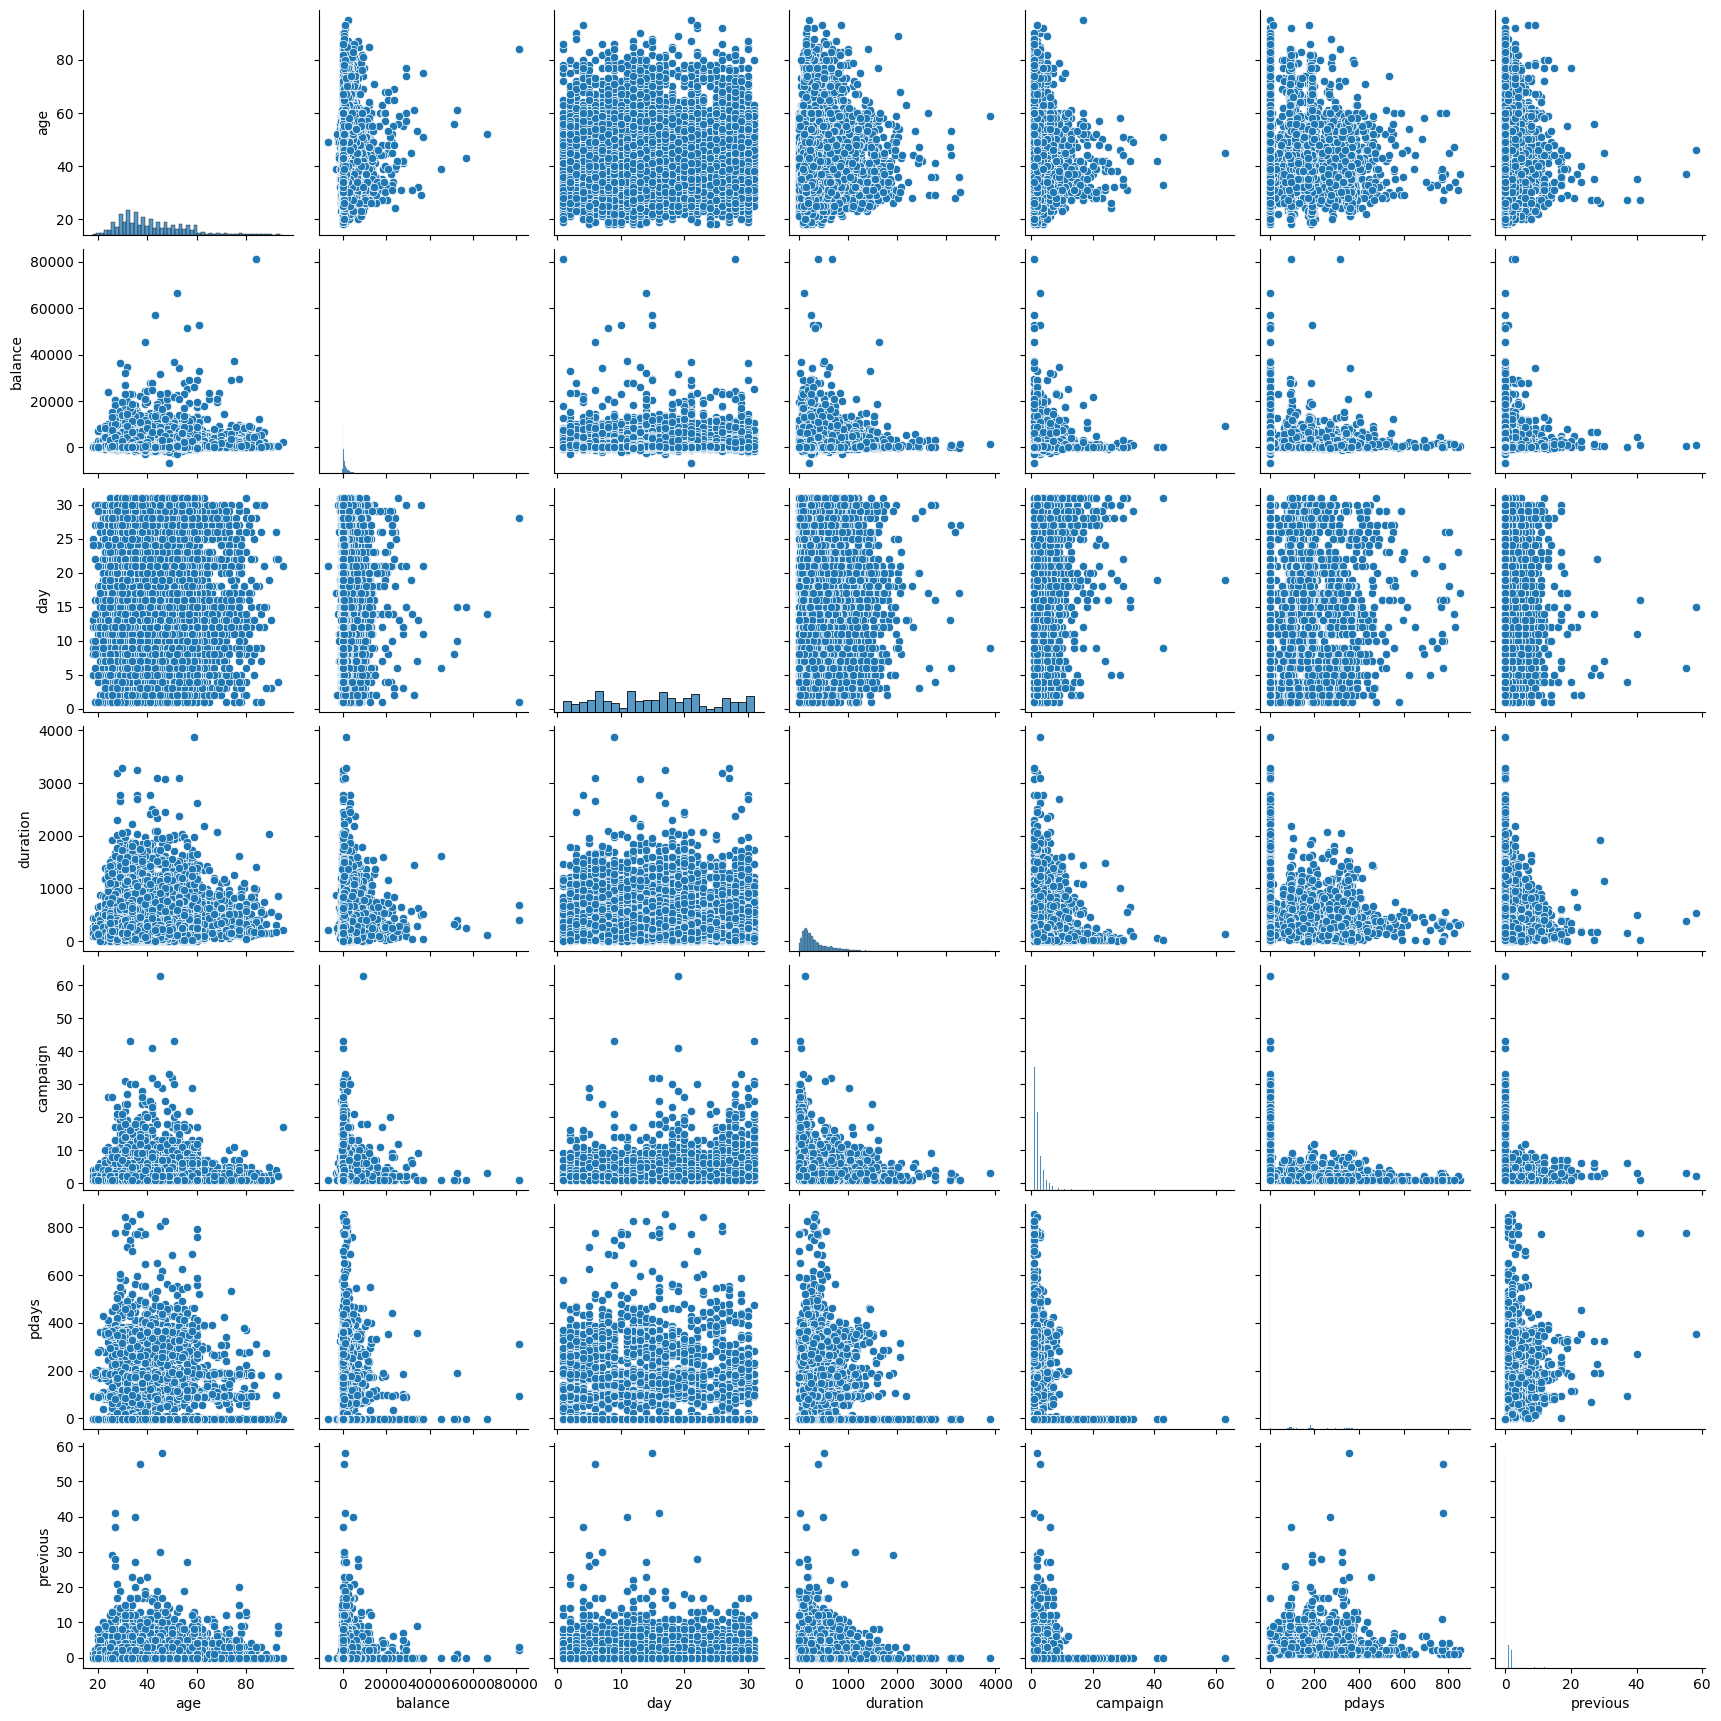

In [52]:
sns.pairplot(df)

In [90]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

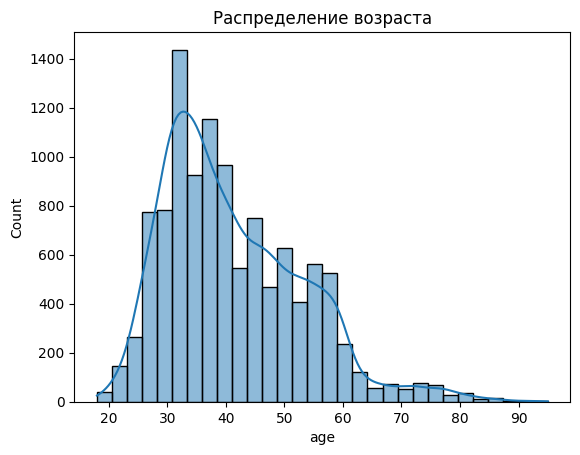

In [32]:
plt.title('Распределение возраста')
sns.histplot(data=df, x='age', bins=30, kde=True);

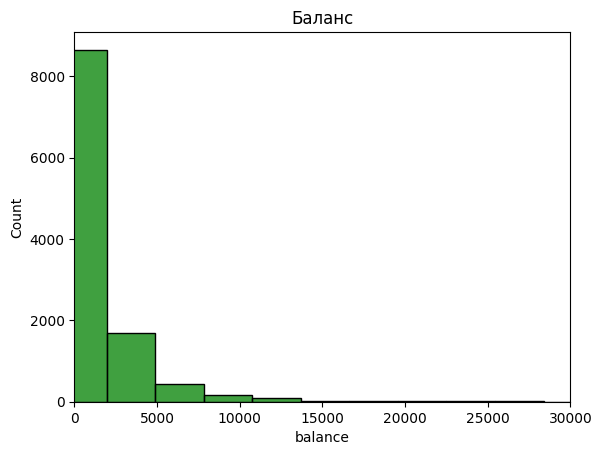

In [50]:
plt.title('Баланс')
plt.xlim(0, 30000)
sns.histplot(data=df, x='balance', bins=30, color='green');

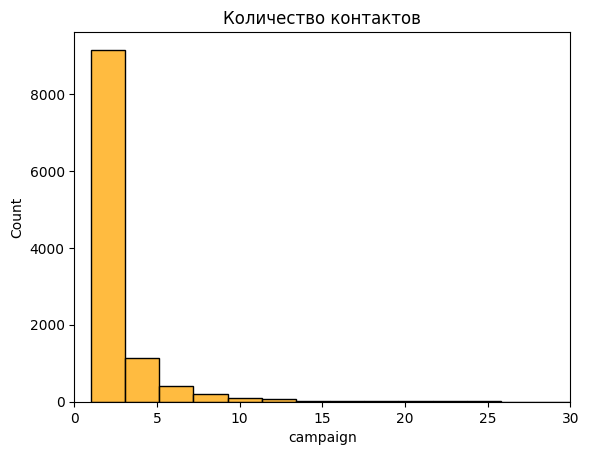

In [37]:
plt.title('Количество контактов')
plt.xlim(0, 30)
sns.histplot(data=df, x='campaign', bins=30, color='orange');

In [53]:
df_corr = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
corrs = df_corr.corr()
corrs

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


<Axes: >

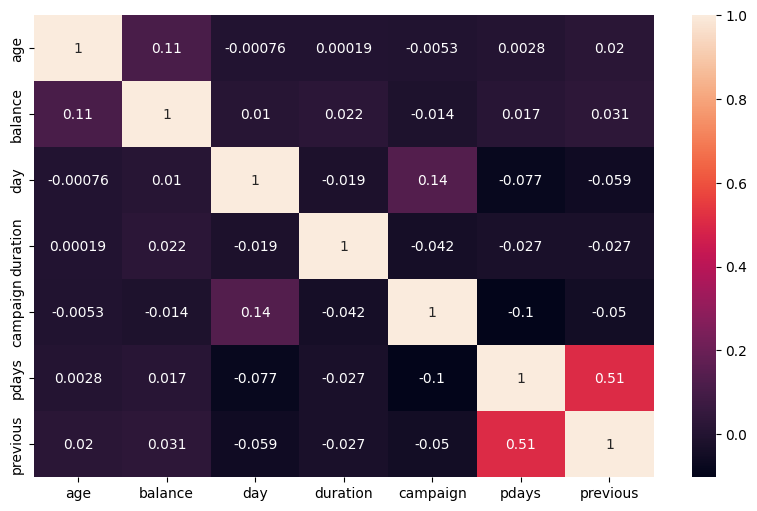

In [93]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=corrs, annot=True)

<Axes: title={'center': 'Согласие на депозит'}, xlabel='deposit', ylabel='count'>

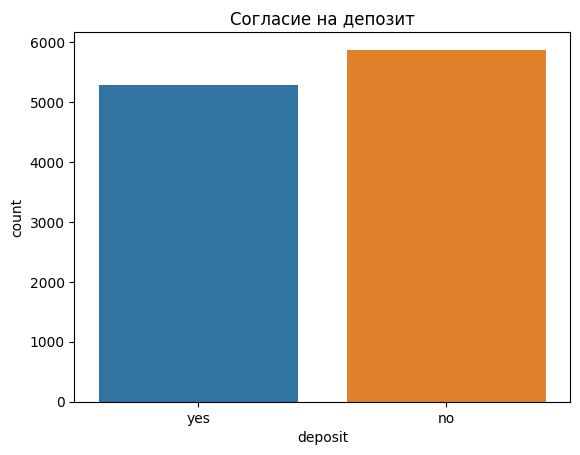

In [9]:
plt.title('Согласие на депозит')
sns.countplot(data=df, x='deposit', hue='deposit')

In [62]:
df['balance'].sort_values(ascending=False)[:10]


3380     81204
3043     81204
8208     66653
10143    56831
2468     52587
3236     52587
10585    51439
4210     45248
6994     37127
10768    36935
Name: balance, dtype: int64

In [63]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

<Axes: xlabel='duration', ylabel='Count'>

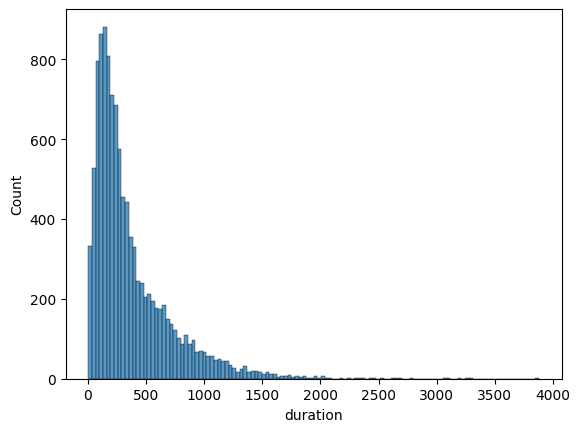

In [64]:
sns.histplot(data=df, x='duration')

# ML

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [8]:
# Модели классификации - log.reg., svm, gradient boost, random forest

In [9]:
df_ml = pd.get_dummies(df.drop('deposit', axis=1), drop_first=True)
y = df['deposit']
X = df_ml.astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

          no       0.81      0.83      0.82      1166
         yes       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



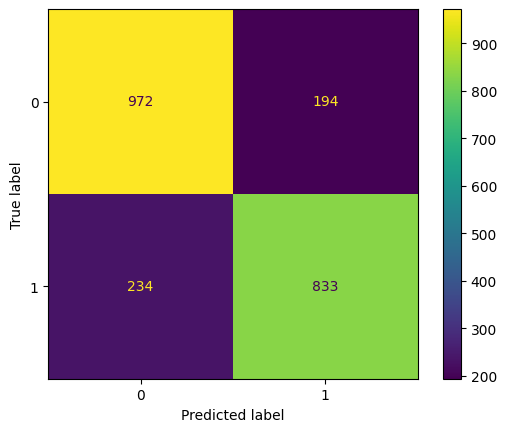

In [108]:
estimate_model(LogisticRegression())

              precision    recall  f1-score   support

          no       0.86      0.81      0.84      1166
         yes       0.81      0.86      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



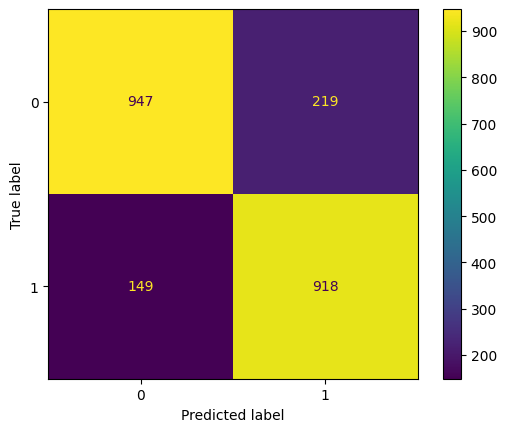

In [109]:
estimate_model(RandomForestClassifier())

              precision    recall  f1-score   support

          no       0.85      0.83      0.84      1166
         yes       0.82      0.84      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



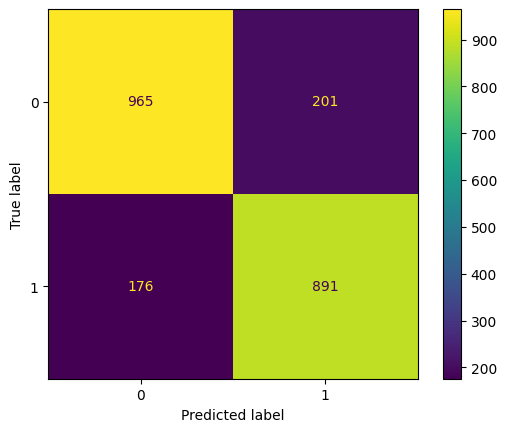

In [110]:
estimate_model(GradientBoostingClassifier())

In [42]:
def estimate_model(model):
    model.fit(scaled_X_train, y_train)
    preds = model.predict(scaled_X_test)
    
    class_rep = classification_report(y_test, preds)
    conf_mat = confusion_matrix(y_test, preds)
    conf_mat_disp = ConfusionMatrixDisplay(conf_mat)
    print(class_rep, end='\n')
    conf_mat_disp.plot()



              precision    recall  f1-score   support

          no       0.85      0.84      0.84      1166
         yes       0.82      0.84      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



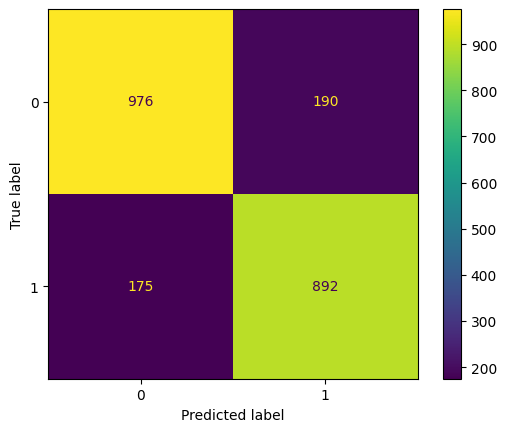

In [112]:
estimate_model(SVC())

Результаты разных моделей машинного обучения "из коробки" примерно одинаковы. Подбор значений при помощи поиска по сетке медленный и не дает значимого прироста в качестве работы модели

In [128]:
m_scaler = MinMaxScaler()
scaled_X = m_scaler.fit_transform(X)
var_ratio = []
for i in range(2, 17):
    pca = PCA(n_components=i)
    pca.fit_transform(scaled_X)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
    

<Axes: >

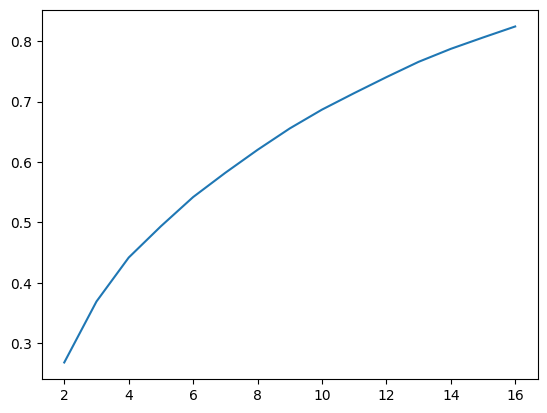

In [129]:
sns.lineplot(x=range(2, 17), y=var_ratio)

Нет явного плато, уменьшение количества признаков повлечет почти соразмерное уменьшение информации

# Логистическая регрессия

In [148]:
def choose_params(model, params):
    grid = GridSearchCV(model, params, verbose=2)
    grid.fit(scaled_X_train, y_train)
    print(grid.best_params_)

In [140]:
params = {'C': [0.5, 1, 1.5, 2]}
choose_params(LogisticRegression(), params)

{'C': 1}


стандартное значение лучше

# SVM

In [141]:
params = {'degree': [2, 3, 4, 5], 'C': [0.5, 1, 1.5]}
choose_params(SVC(), params)

{'C': 1.5, 'degree': 2}


In [ ]:
# grid search при {'degree': [3, 4], 'C': [1, 1.5]}: best params {'C': 1.5, 'degree': 3}
# grid search при {'degree': [2, 3, 4, 5], 'C': [0.5, 1, 1.5]}: best params {'C': 1.5, 'degree': 2}

              precision    recall  f1-score   support

          no       0.85      0.83      0.84      1166
         yes       0.82      0.84      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



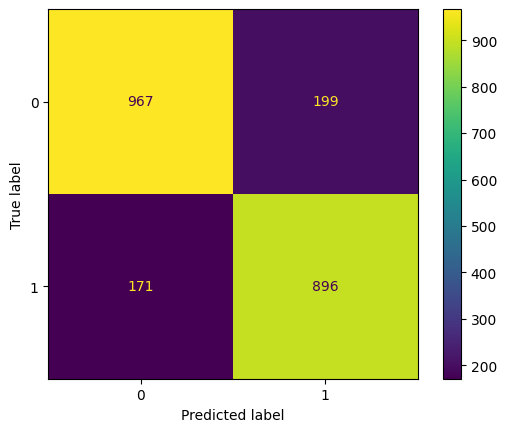

In [114]:
model = SVC(degree=2, C=1.5)
estimate_model(model)

# Random forest

In [152]:
params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]}
choose_params(RandomForestClassifier(), params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=30; total time=   0.2s
[CV] END ....................................n_e

              precision    recall  f1-score   support

          no       0.86      0.81      0.84      1166
         yes       0.80      0.86      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.84      0.83      0.83      2233



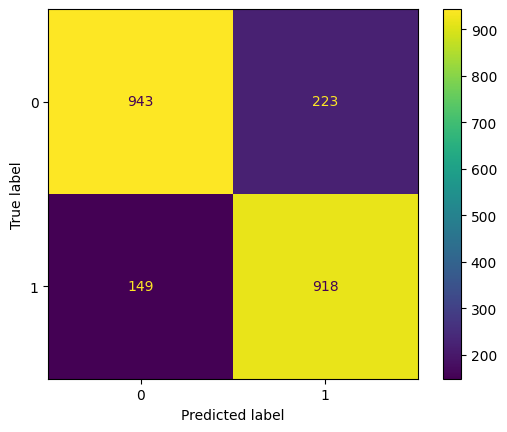

In [58]:
model_rf = RandomForestClassifier(n_estimators=130)
estimate_model(model_rf)

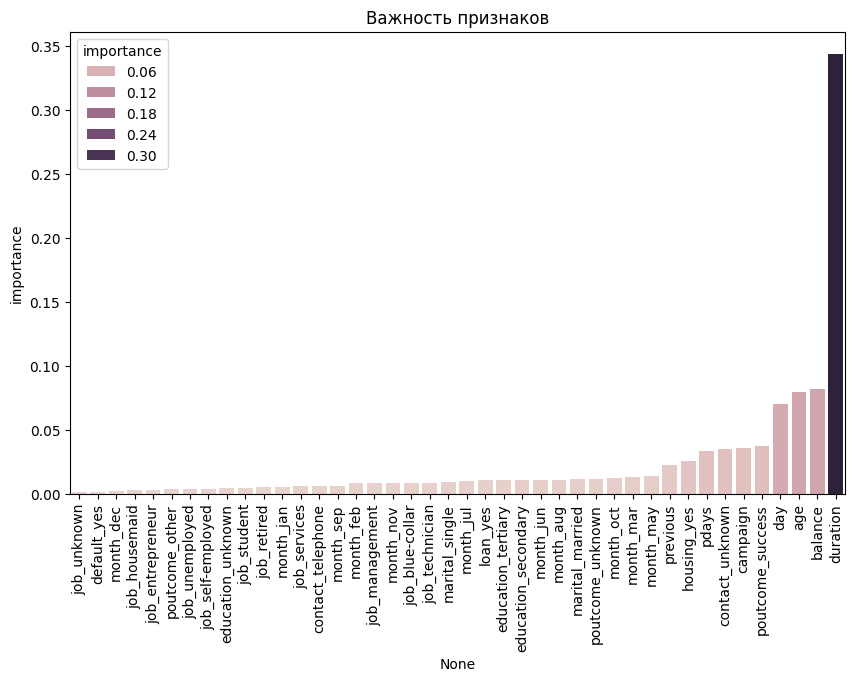

In [57]:
values_imp = model_rf.feature_importances_
values_imp = pd.DataFrame(index=df_ml.columns,data=values_imp,columns=['importance'])
values_imp = values_imp.sort_values('importance')
plt.figure(figsize=(10, 6))
plt.xticks(rotation = 90)
plt.title("Важность признаков")
sns.barplot(data=values_imp, x=values_imp.index, y=values_imp['importance'], hue='importance');

# Gradient boosting

In [ ]:
params = {'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180], 'learning_rate': [0.05, 0.1, 0.3]}
choose_params(GradientBoostingClassifier(), params)

              precision    recall  f1-score   support

          no       0.85      0.83      0.84      1166
         yes       0.82      0.84      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



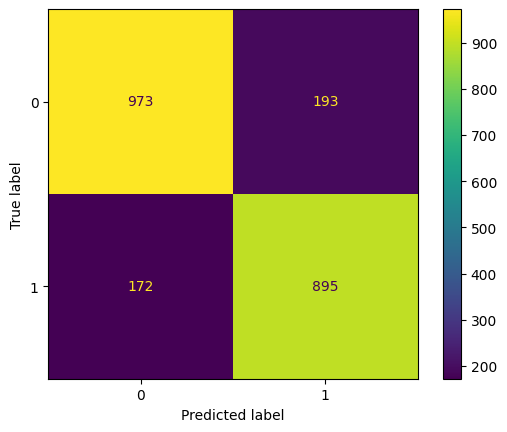

In [59]:
#лучшие параметры {'learning_rate': 0.3, 'n_estimators': 140} для params = {'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180], 'learning_rate': [0.05, 0.1, 0.3]}
model_gb = GradientBoostingClassifier(n_estimators=140, learning_rate=0.3)
estimate_model(model_gb)

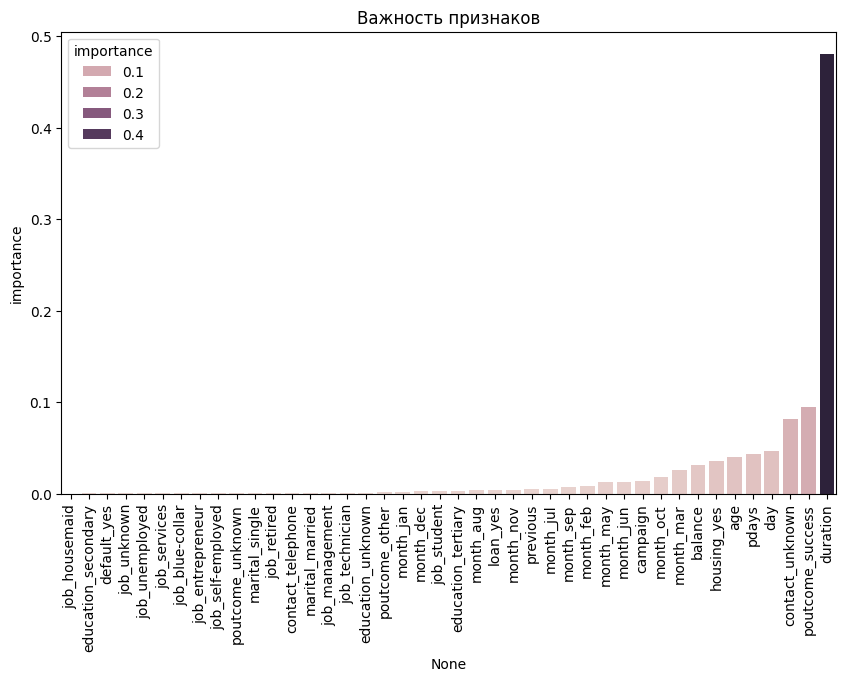

In [61]:
values_imp = model_gb.feature_importances_
values_imp = pd.DataFrame(index=df_ml.columns,data=values_imp,columns=['importance'])
values_imp = values_imp.sort_values('importance')
plt.figure(figsize=(10, 6))
plt.xticks(rotation = 90)
plt.title("Важность признаков")
sns.barplot(data=values_imp, x=values_imp.index, y=values_imp['importance'], hue='importance');

# Сохраняем и используем любую обученную модель

In [69]:
from joblib import dump, load

In [157]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC(degree=2, C=1.5))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1.5, degree=2))])

In [158]:
dump(pipe, 'pipeline_model.joblib')

['pipeline_model.joblib']

In [159]:
loaded_pipe = load('pipeline_model.joblib')

In [188]:
data_check = pd.DataFrame(data=X_train.values, index=X_train.index, columns=X_train.columns)[:1]
data_check

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3955,28,5741,10,1042,5,200,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [189]:
data_check.at[3955, 'age'] = 20
data_check

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3955,20,5741,10,1042,5,200,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [190]:
pipe.predict(data_check)

array(['yes'], dtype=object)